# Visualizing Supervised Machine Learning

Credit
* Inspirations by Leonard Thiele,  Antonio Sánchez Friedeberg, and Sean Pedersen
* Parts of the code based on material from scikit learn documentation

_Please send questions and feedback to oliver.zeigermann@gmail.com or @DJCordhose on Twitter, I will be happy to explain or add to this notebook_

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
# plt.xkcd()

In [4]:
# if this is true, all images are saved to disk
global_print_flag = False

In [5]:
!mkdir tmp_figures

mkdir: cannot create directory ‘tmp_figures’: File exists


# Loading and exploring our data set

This is a database of customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past

* 0 - red: many accidents
* 1 - green: few or no accidents
* 2 - yellow: in the middle        

In [8]:
# Choose one of the two following data sets, the larger one gives better results, but might clutter the visualization depending on resolution

!curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-1500.csv
# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-300.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26935  100 26935    0     0   199k      0 --:--:-- --:--:-- --:--:--  199k


In [6]:
import pandas as pd
# df = pd.read_csv('./insurance-customers-300.csv', sep=';')
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [7]:
df.head()

max speed   age  thousand km per year  group
0      148.0  44.0                  25.0      1
1      168.0  54.0                  24.0      1
2      161.0  26.0                  34.0      0
3      137.0  25.0                  10.0      2
4      164.0  38.0                  22.0      1

In [8]:
df.describe()

max speed          age  thousand km per year        group
count  1500.000000  1500.000000           1500.000000  1500.000000
mean    171.386000    44.969333             30.511333     0.998667
std      19.269126    16.935040             15.112317     0.816768
min     118.000000    18.000000              5.000000     0.000000
25%     158.000000    32.000000             18.000000     0.000000
50%     170.000000    42.000000             29.000000     1.000000
75%     187.000000    55.000000             42.000000     2.000000
max     216.000000    90.000000             84.000000     2.000000

## A pairplot gives you a nice overview of your data with just a few lines of code

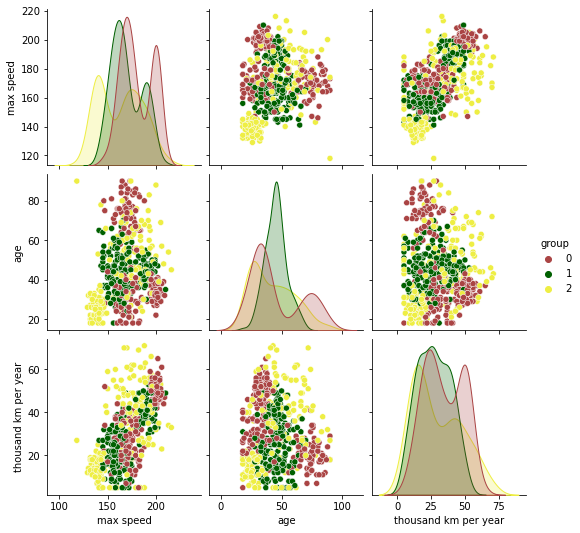

In [10]:
import seaborn as sns
# sns.set(style="ticks")

sample_df = df.sample(n=600, random_state=42)

colors_light = {0: '#FFAAAA', 1: '#AAFFAA', 2: '#FFFFDD'}
colors_bold = {0: '#AA4444', 1: '#006000', 2: '#EEEE44'}

sns.pairplot(sample_df, hue="group", palette=colors_bold)

# Concepts

## First important concept: You train a machine with your data to make it learn the relationship between some input data and a certain label - this is called supervised learning

In [11]:
# we deliberately decide this is going to be our label, it is often called lower case y
y=df['group']

In [12]:
# since 'group' is now the label we want to predict, we need to remove it from the training data 
df.drop('group', axis='columns', inplace=True)

In [15]:
# input data often is named upper case X, the upper case indicates, that each row is a vector
X = df.values
X.shape

(1500, 3)

### We restrict ourselves to two dimensions for now

Because this is all we really can visualize in 2d

In [36]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
cmap_distinct = ListedColormap(['#FF0000', '#EEEE11', '#0000FF'])
font_size=25
title_font_size=40

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    sc = None
    if print:
        sc = ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        sc = ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_distinct, s=100, marker='o', edgecolors='k')
        
    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(title, fontsize=title_font_size)
    fig.colorbar(sc)
    if fname and global_print_flag:
        fig.savefig('tmp_figures/'+fname)
        
def plot_keras_prediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                          mesh=True, fixed=None, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=(20,10))

    if clf and mesh:
        grid_X = np.array(np.c_[yy.ravel(), xx.ravel()])
        if fixed:
            fill_values = np.full((len(grid_X), 1), fixed)
            grid_X = np.append(grid_X, fill_values, axis=1)
        Z = clf.predict(grid_X)
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
        
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    if print:
        ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        sc = ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_distinct, s=100, marker='o', edgecolors='k')
        
    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(title, fontsize=title_font_size)
    fig.colorbar(sc)
    if fname and global_print_flag:
        fig.savefig('tmp_figures/'+fname)


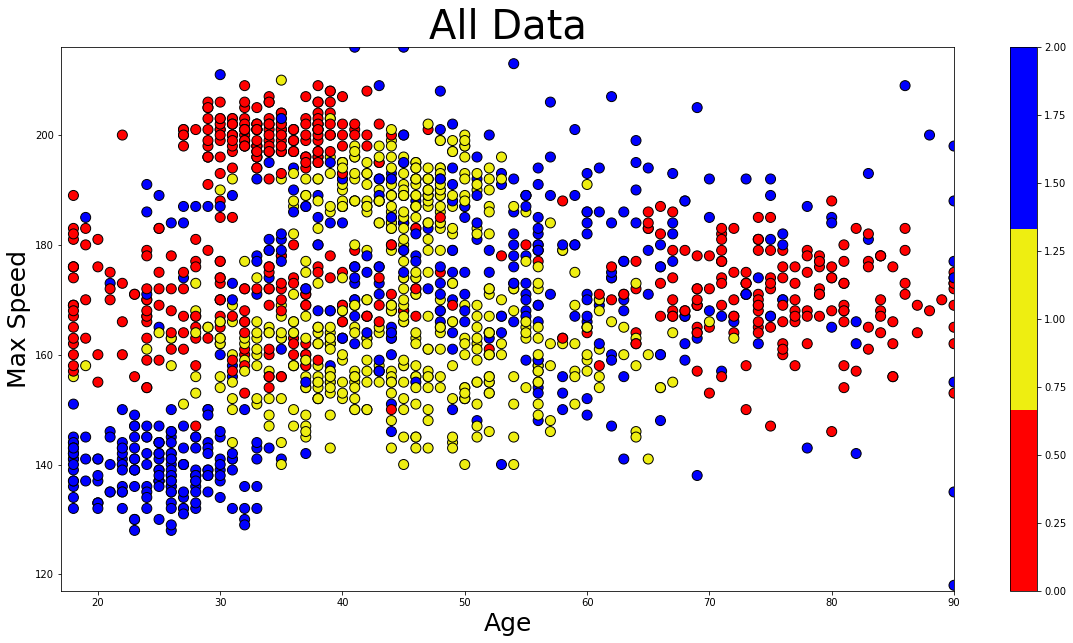

In [37]:
X_kmh_age = X[:, :2] 
plotPrediction(None, X_kmh_age[:, 1], X_kmh_age[:, 0], 
               'Age', 'Max Speed', y, mesh=False,
                title="All Data",
                fname='all.png')

## We provide a few hand built classifiers as base lines

* a base line can be a very simple classifier that shows what is doable with limited effort
* a more sophisticated approach needs to do better than a base line, otherwise it has no point
* how well a classifier does is described as a score for accuracy

In [38]:
# 0: red
# 1: green
# 2: yellow

class ClassifierBase:
    def predict(self, X):
        return np.array([ self.predict_single(x) for x in X])
    def score(self, X, y):
        n = len(y)
        correct = 0
        predictions = self.predict(X)
        for prediction, ground_truth in zip(predictions, y):
            if prediction == ground_truth:
                correct = correct + 1
        return correct / n

from random import randrange

class RandomClassifier(ClassifierBase):
    def predict_single(self, x):
        return randrange(3)

In [39]:
random_clf = RandomClassifier()

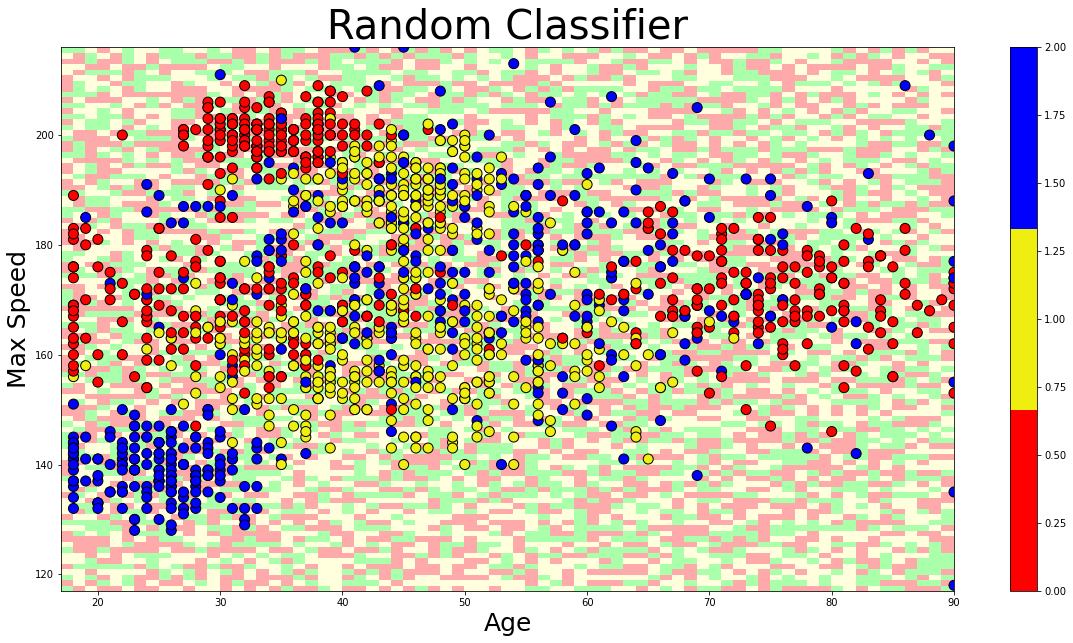

In [40]:
plotPrediction(random_clf, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="Random Classifier",
                fname='random.png')

In [41]:
# this computes how many values are predicted correctly, this should be 0.33 (33%) on average, but will differ with each run

random_clf.score(X, y)

0.3353333333333333

In [42]:
# just a few rules created by hand

class BaseLineClassifier(ClassifierBase):
    def predict_single(self, x):
        try:
            speed, age, km_per_year = x
        except:
            speed, age = x
            km_per_year = 0
        if age < 25:
            if speed > 180:
                return 0
            else:
                return 2
        if age > 75:
            return 0
        if km_per_year > 50:
            return 0
        if km_per_year > 35:
            return 2
        return 1

In [43]:
base_clf = BaseLineClassifier()

In [44]:
plotPrediction(base_clf, X[:, 1], X[:, 0], 
               'Age', 'Max Speed', y,
                title="Manual Classifier",
                fname='prog.png')

## The lines between the areas of prection are called _decision boundaries_

In [45]:
base_clf.score(X, y)

0.454

## Second important concept: To have an idea how well the training worked, we save same data to test our model on previously unseen data. 

* The real objective is to have a generalized model that works well on the test data.
* How well it performs on this test data as opposed to the training data tells us quite a bit as well.
* Typical splits are 60% for training and 40% for testing or 80/20
* It is important that we do not use the test data to tweak the hyper parameters of our learning strategy - in this case the test data would (indirectly) influence the training and can no longer tell how well we did
* evaluate the test date set only once at the end of your experiment

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# using stratefy we get a balanced number of samples per category (important!)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1125, 3), (1125,), (375, 3), (375,))

In [49]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([376, 375, 374]))

In [50]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([125, 125, 125]))

In [51]:
X_train_2_dim = X_train[:, :2]
X_test_2_dim = X_test[:, :2]

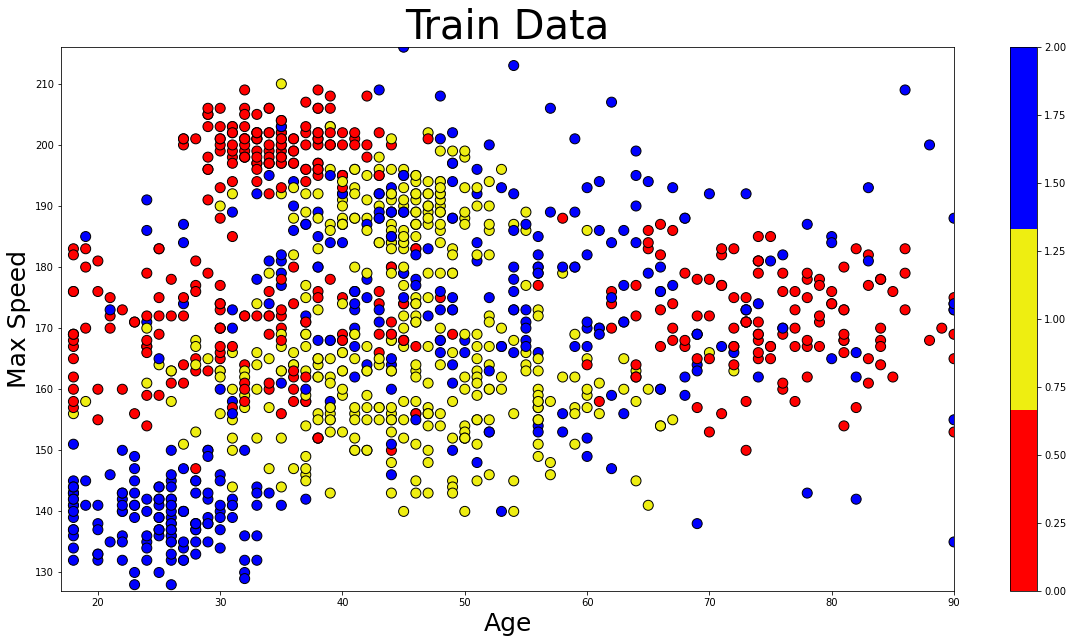

In [52]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, mesh=False,
                title="Train Data",
                fname='train.png')

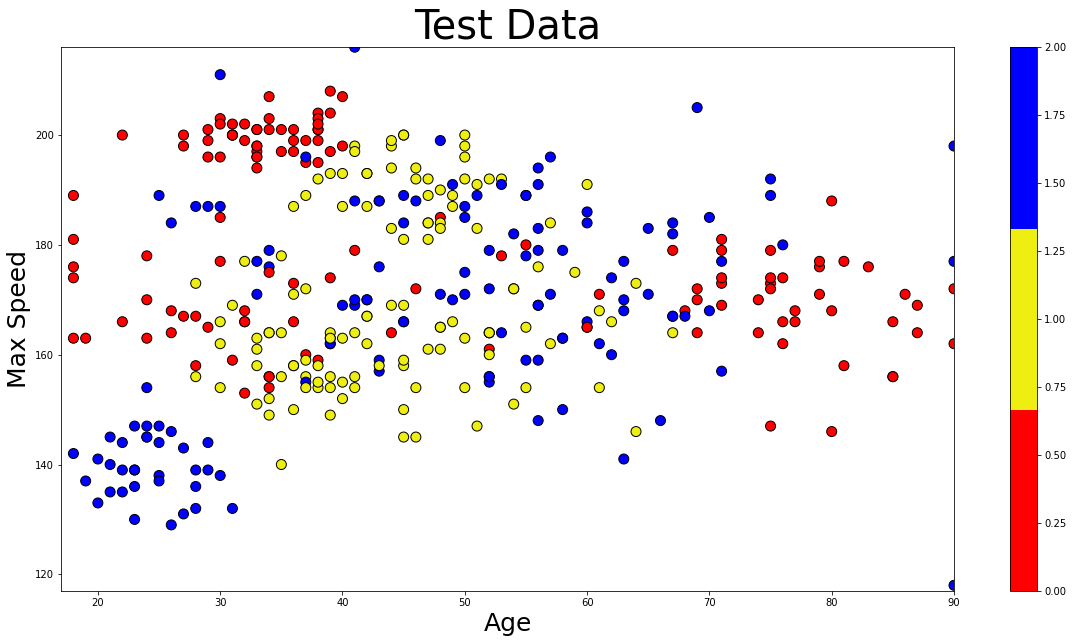

In [53]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, mesh=False,
                title="Test Data",
                fname='test.png')

## KNN - Most basic learning strategy: Look at the neighbors to make a prediction for a sample yet unknown

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(3)

In [62]:
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 1.45 ms, sys: 0 ns, total: 1.45 ms
Wall time: 1.42 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [63]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, KNN, k=3",
                fname='knn1-train.png')

In [64]:
clf.score(X_train_2_dim, y_train)

0.8044444444444444

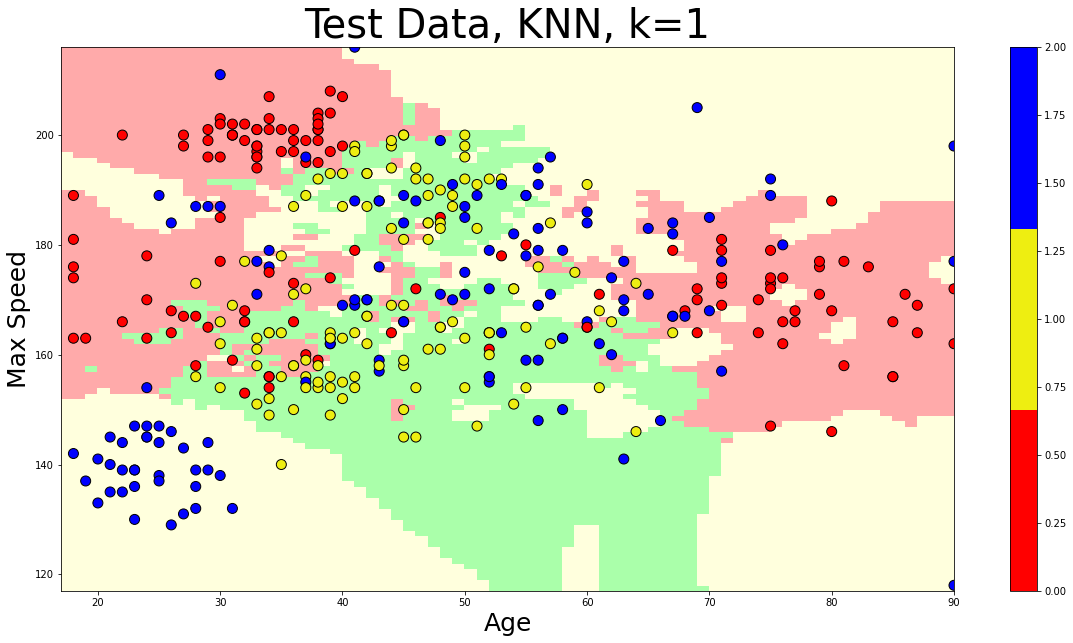

In [65]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, KNN, k=1",
                fname='knn1-test.png')

In [66]:
clf.score(X_test_2_dim, y_test)

0.6533333333333333

In [67]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score

In [68]:
# cross_val_score?

Cross Validation splits the train data in different ways and performs a number of training runs (3 in this case) 

In [69]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.65333333, 0.68888889, 0.65333333, 0.67555556, 0.71555556])

In [70]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.68 (+/- 0.05)


## Third important concept: Our objective is to make the best prediction for unknown samples. This is called generalization. If we perform well on knwon data, but less good on unknown data this is called overfitting. This is to be avoided. Measures taken to avoid overfitting are also known as _regularization_.

### In KNN we reduce overfitting by taking more neighbors into account

We can try what is the best number of numbers manually, but grid search does the same thing, only with less manual effort. This one tries the number of neighbors between 1 and 50

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 50)),
    'weights': ['uniform', 'distance']
    }
clf = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

Wall time: 8.09 s


{'n_neighbors': 23, 'weights': 'uniform'}

In [ ]:
clf = KNeighborsClassifier(n_neighbors=23, weights='uniform')
%time clf.fit(X_train_2_dim, y_train)

Wall time: 2 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [ ]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, KNN, k=23",
                fname='knn23-train.png')

### A rule of thumb: Smoother decision boundaries imply less overfitting

In [ ]:
clf.score(X_train_2_dim, y_train)

0.7322222222222222

In [ ]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, KNN, k=23",
                fname='knn23-test.png')

In [ ]:
clf.score(X_test_2_dim, y_test)

0.7216666666666667

In [ ]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.68106312, 0.74666667, 0.69565217])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.06)


## Descision Trees

* Another learning strategy, just like KNN is one
* Splits our data set on a certain variable
* Similar to what we have done in the manual classifier, but here the rules are actually learned

In [71]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 2.38 ms, sys: 0 ns, total: 2.38 ms
Wall time: 2.45 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
# we perform at most 20 splits of our data until we make a decision where the data point belongs

clf.tree_.max_depth

18

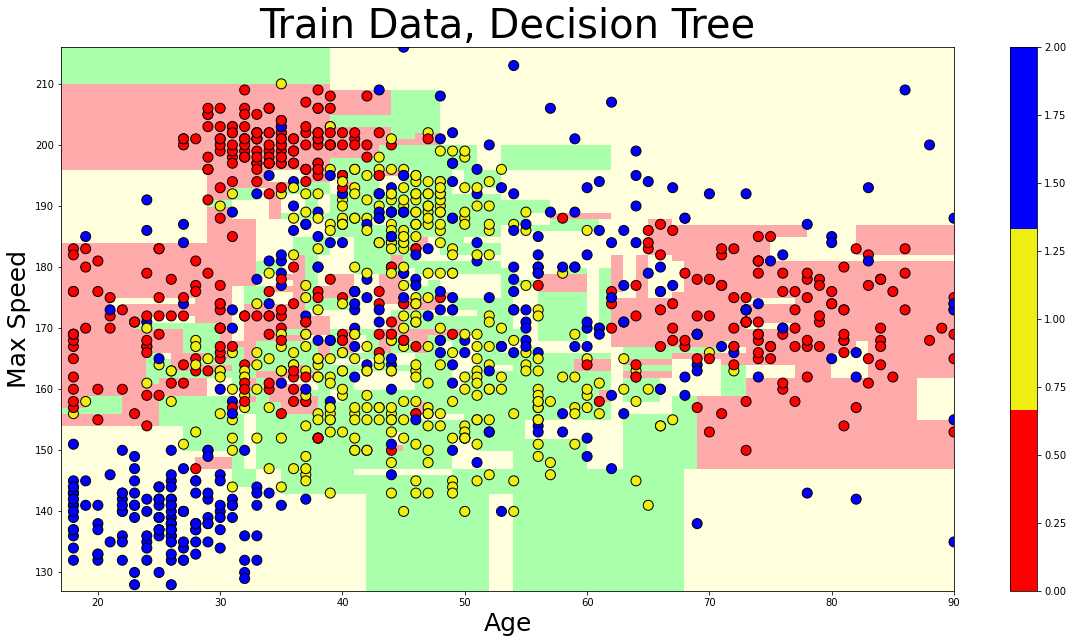

In [73]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Decision Tree",
                fname='dt-overfit-train.png')

In [74]:
clf.score(X_train_2_dim, y_train)

0.9493333333333334

In [75]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.6       , 0.62222222, 0.61333333, 0.63555556, 0.65333333])

In [76]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.04)


In [77]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Decision Tree",
                fname='dt-overfit-test.png')

In [78]:
clf.score(X_test_2_dim, y_test)

0.6

We overfit heavily and need to change the relevant parameters of our tree
* its maximum number of spits (depth) - if there is no limit, we can make as many splits as it takes to perfectly match all train data (overfitting)
* how many samples we need at least for a leaf - if it is just one, we could perfectly fit all training data (overfitting)
* how many samples do we need to make another split - not as crucial as the other two, but can still limit overfitting

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

CPU times: user 6.06 s, sys: 41.7 ms, total: 6.1 s
Wall time: 16.8 s


{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [82]:
clf = DecisionTreeClassifier(max_depth=7,
                              min_samples_leaf=4,
                              min_samples_split=19)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 95 µs, sys: 2.77 ms, total: 2.87 ms
Wall time: 2.53 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=19,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
clf.tree_.max_depth

7

In [84]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data, Regularized Decision Tree",
                fname='dt-sweet-train.png')

In [85]:
clf.score(X_train_2_dim, y_train)

0.7635555555555555

In [86]:
scores = cross_val_score(clf, X_train_2_dim, y_train, n_jobs=-1)
scores

array([0.68444444, 0.75111111, 0.68888889, 0.72888889, 0.73777778])

In [87]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.05)


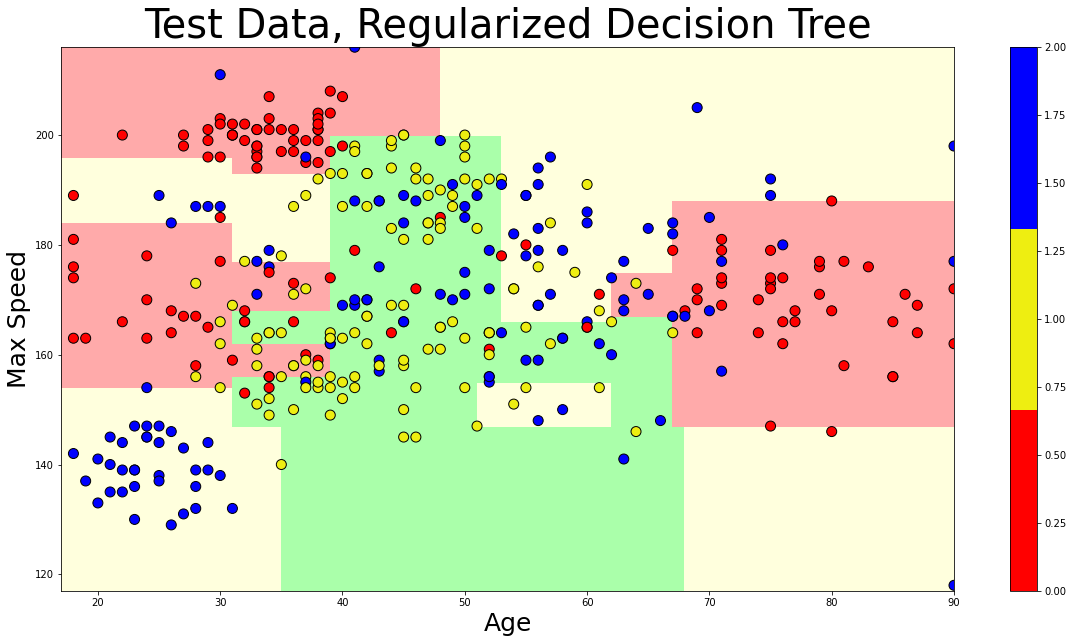

In [88]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Decision Tree",
                fname='dt-sweet-test.png')

In [89]:
clf.score(X_test_2_dim, y_test)

0.6853333333333333

## Random Forest
* We fight overfitting in decision trees with some success
* However, inherent to their nature, decision trees tend to overfit
* Random Forest is an ensemble technique that trains a number of simple decision trees and uses a majority vote over all of them for prediction
* While each decision tree still overfits using many of them softens this problems
* You still need to regularize the underlying decision trees
* sklearn has a default of 10 decision trees for random forest
* Random Forest is the swiss army knife of machine learning

In [90]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 275 ms, sys: 33.9 ms, total: 309 ms
Wall time: 246 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [91]:
clf.score(X_train_2_dim, y_train)

0.9493333333333334

In [92]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Random Forest",
                fname='rf-overfit-train.png')

In [93]:
clf.score(X_test_2_dim, y_test)

0.6266666666666667

In [94]:
# brute force grid search is far too expensive

param_grid = {
    'n_estimators': list(range(3,20)),
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
clf = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs=-1)
# %time clf.fit(X_train_2_dim, y_train)
# clf.best_params_

Unfortunately, training random forest classifiers is more expensive than decision trees by the number of estimators it uses (10 in our case). This makes using a deterministic grid search over all parameters prohibitively expensive. We instead use a randomized search, that tries 100 different values and we hope to find the best here.

In [95]:
# http://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(3,20),
    "max_depth": randint(2, 25),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11)
}

clf = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=1000, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

CPU times: user 7.74 s, sys: 206 ms, total: 7.94 s
Wall time: 1min 24s


{'max_depth': 23,
 'min_samples_leaf': 8,
 'min_samples_split': 5,
 'n_estimators': 16}

In [97]:
# parameters might vary a bit with each run, because it is a random search
clf = RandomForestClassifier(max_depth=23, min_samples_leaf=8, min_samples_split=5, n_estimators=16, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 40.3 ms, sys: 8.81 ms, total: 49.1 ms
Wall time: 113 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=23, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=16, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [98]:
clf.score(X_train_2_dim, y_train)

0.7635555555555555

In [99]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Regularized Random Forest",
                fname='rf-sweet-test.png')

In [100]:
clf.score(X_test_2_dim, y_test)

0.7013333333333334

## Support Vector Machines (SVM)
* SVMs used to be the hot stuff before neural networks stole the show
* SVMs choose a small number of data points to decide where to draw the decision boundary, they are called the *support vectors*

In its base version SVMs can only use lines as decision boundaries. Let's see how well this works.

In [101]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 626 ms, sys: 0 ns, total: 626 ms
Wall time: 629 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [102]:
clf.score(X_train_2_dim, y_train)

0.4533333333333333

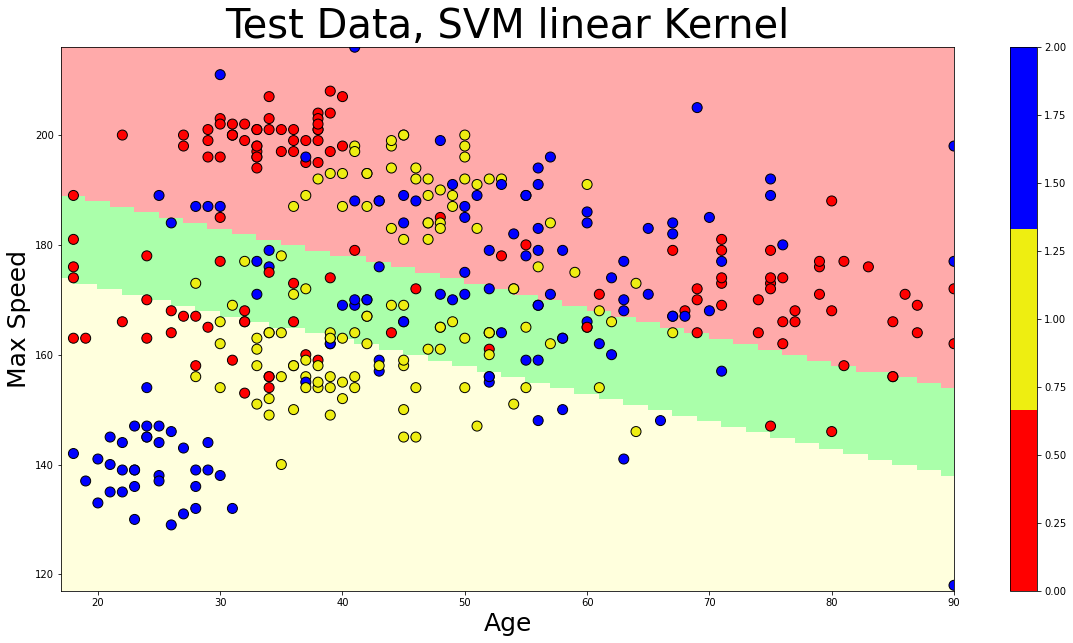

In [103]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, SVM linear Kernel",
                fname='svm-underfit-linear-train.png')

#### SVM Kernels

* As we can see using lines only, we can not even fit the training data, this is called *underfitting*.
* For most realisitic examples we need something better called the 'kernel trick'
* We transform the original problem space into another that is separable by lines only
* Radial Base Functions 'rbf' can approximate any function and are trained to perform this transformation

In [104]:
from sklearn.svm import SVC
clf = SVC()
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 49.6 ms, sys: 0 ns, total: 49.6 ms
Wall time: 52.4 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [105]:
clf.score(X_train_2_dim, y_train)

0.6417777777777778

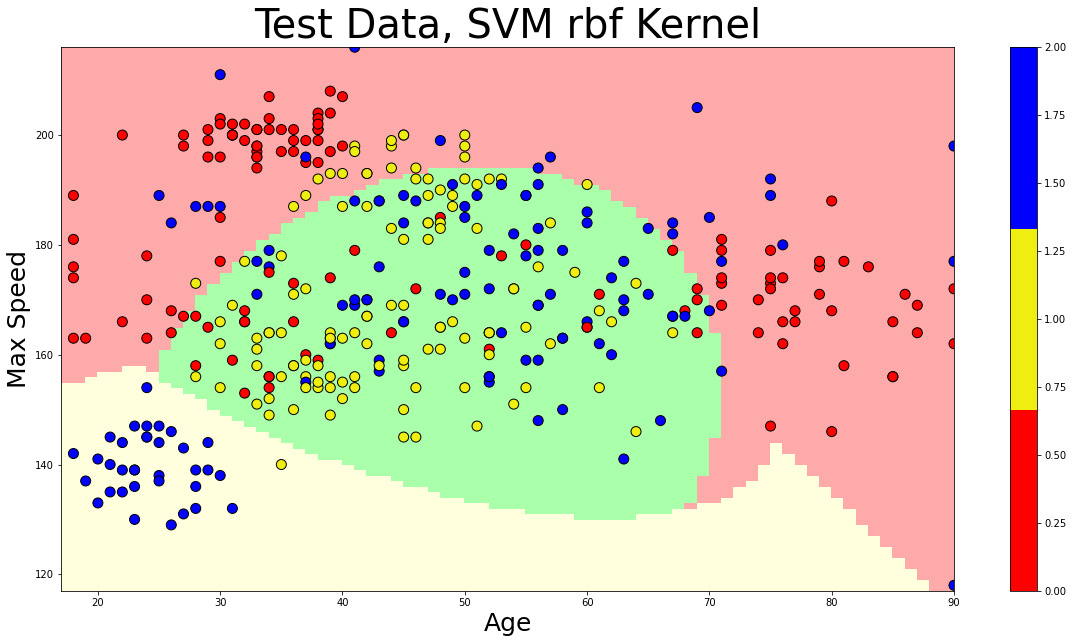

In [106]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, SVM rbf Kernel",
                fname='svm-overfit-test.png')

In [107]:
clf.score(X_test_2_dim, y_test)

0.616

In [108]:
# SVC?

Again we strongly overfit and need to regularize our model. The two important parameters are
* C: decides how expensive it is to misclassify one of our support vectors, the smaller the more tolerant
* gamma: the higher the more points remote from the support vectors influence where the decision boundaries go

In [109]:
param_grid = {
    'C': list(np.append(np.arange(0.1, 1.0, 0.1), np.arange(2, 10, 1))),
    'gamma': list(np.append(np.arange(0.001, 0.1, 0.0005), np.arange(.02, 1.0, 0.1))),
}
clf = GridSearchCV(SVC(), param_grid, n_jobs=-1)
%time clf.fit(X_train_2_dim, y_train)
clf.best_params_

KeyboardInterrupt: ignored

In [110]:
clf = SVC(C=8, gamma=0.001)
%time clf.fit(X_train_2_dim, y_train)

CPU times: user 40 ms, sys: 885 µs, total: 40.9 ms
Wall time: 43.3 ms


SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
clf.score(X_train_2_dim, y_train)

0.7324444444444445

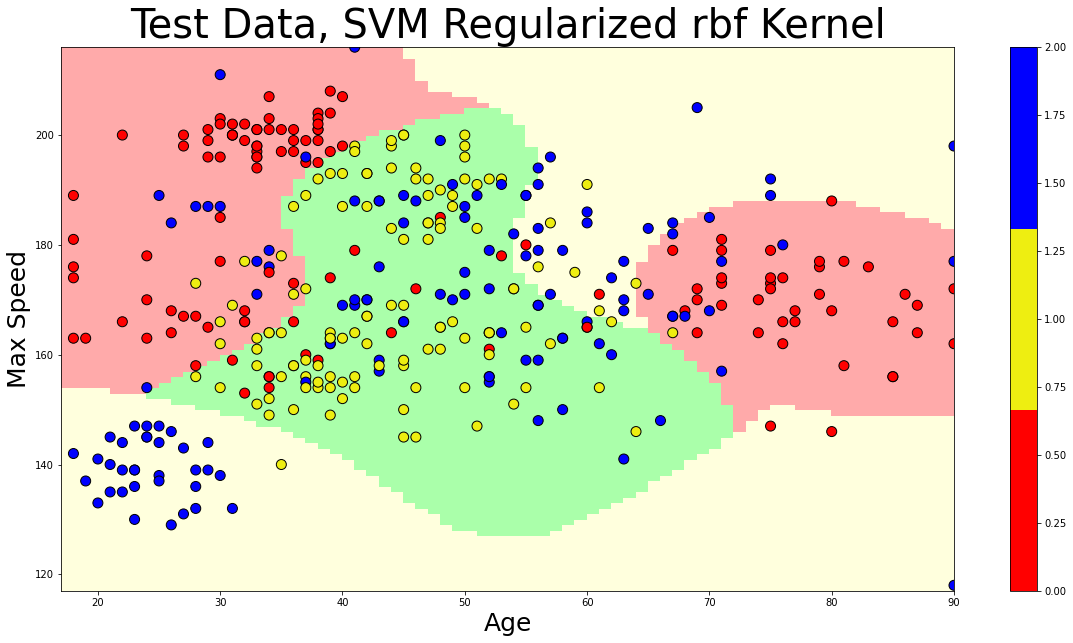

In [112]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, SVM Regularized rbf Kernel",
                fname='svm-reg-test.png')

In [113]:
clf.score(X_test_2_dim, y_test)

0.7093333333333334

## _Important_ if you let this run on Colab switch on the GPU option, because otherwise this part will take quite some time

## Neural Networks using TensorFlow and Keras Layers
* Neural Networks consist of artificial neurons you organize in layers
* each neuron is very simple, but, theoretically, having enough of them in a single layer can approximate any funtion
* practically, we use 2 or 3 layers, as this has turned out to work well
* the more neurons and the more layers you use the longer the network takes to train
* neural networks often are no longer approachable using cross validation and grid search to find suitable hyper parameters

## Neuron (aka node or unit)

A neuron takes a number of numerical inputs, multiplies each with a weight, sums up all weighted input and adds bias (constant) to that sum. From this it creates a single numerical output. For one input (one dimension) this would be a description of a line. For more dimensions this describes a hyper plane that can serve as a decision boundary. Typically, this output is transformed using an activation function which compresses the output to a value between 0 and 1 (sigmoid), or between -1 and 1 (tanh) or sets all negative values to zero (relu).

It is not really important to understand the details of a neural network. Practically how you configure them to form something more powerful is much more important. This, however, is still a very experimental domain, so there really is no conscise explanation and understanding how they work.


In [115]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [116]:
# tiny little pieces of feature engeneering, we need a one-hot-encoding for our 3 groups
num_categories = 3

y_train_categorical = tf.keras.utils.to_categorical(y_train, num_categories)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_categories)

We start with two layers each having 500 neurons

In [ ]:
# tf.keras.layers.Dense?

In [118]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(200, name='hidden1', activation='relu', input_dim=2))
model.add(tf.keras.layers.Dense(200, name='hidden2', activation='relu'))
model.add(tf.keras.layers.Dense(200, name='hidden3', activation='relu'))
# model.add(tf.keras.layers.Dense(500, name='hidden4', activation='relu', input_dim=2))
# model.add(tf.keras.layers.Dense(500, name='hidden5', activation='relu'))

model.add(tf.keras.layers.Dense(num_categories, name='softmax', activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 200)               600       
_________________________________________________________________
hidden2 (Dense)              (None, 200)               40200     
_________________________________________________________________
hidden3 (Dense)              (None, 200)               40200     
_________________________________________________________________
softmax (Dense)              (None, 3)                 603       
Total params: 81,603
Trainable params: 81,603
Non-trainable params: 0
_________________________________________________________________


In [120]:
# tf.keras.optimizers.Adam?

In [121]:
# https://keras.io/optimizers/
sgd = tf.keras.optimizers.SGD(lr=1, decay=1e-6, momentum=0.9, nesterov=True)
adam = tf.keras.optimizers.Adam(lr=0.1)

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
#              optimizer=adam,
#              optimizer=sgd,
             metrics=['accuracy'])

If you do not train for too long, even without any further regularization this network will not overfit by too much, but look at how strange the decision boundaries look like

In [123]:
BATCH_SIZE=32
EPOCHS = 2000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, verbose=1)
# checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-model.epoch-{epoch:02d}-val_loss-{val_loss:.2f}.hdf5',
#                                                 verbose = 1, save_best_only=True)
# checkpoint = tf.keras.callbacks.ModelCheckpoint('keras-model.hdf5', verbose = 1, save_best_only=True)

# %time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[checkpoint, early_stopping])
model.fit(X_train_2_dim, y_train_categorical, 
                epochs=EPOCHS, batch_size=BATCH_SIZE, 
                validation_data=(X_test_2_dim, y_test_categorical), 
                callbacks=[early_stopping])

Epoch 1/2000
36/36 [==============================] - 1s 7ms/step - loss: 3.7649 - accuracy: 0.3458 - val_loss: 1.6127 - val_accuracy: 0.3307
Epoch 2/2000
36/36 [==============================] - 0s 3ms/step - loss: 1.0996 - accuracy: 0.4249 - val_loss: 1.0006 - val_accuracy: 0.4133
Epoch 3/2000
36/36 [==============================] - 0s 3ms/step - loss: 1.0467 - accuracy: 0.4898 - val_loss: 1.4806 - val_accuracy: 0.3627
Epoch 4/2000
36/36 [==============================] - 0s 3ms/step - loss: 1.1175 - accuracy: 0.4756 - val_loss: 0.9498 - val_accuracy: 0.5013
Epoch 5/2000
36/36 [==============================] - 0s 3ms/step - loss: 1.0853 - accuracy: 0.4693 - val_loss: 1.1774 - val_accuracy: 0.4240
Epoch 6/2000
36/36 [==============================] - 0s 3ms/step - loss: 1.0024 - accuracy: 0.5164 - val_loss: 1.0157 - val_accuracy: 0.5360
Epoch 7/2000
36/36 [==============================] - 0s 3ms/step - loss: 0.9701 - accuracy: 0.5227 - val_loss: 0.9818 - val_accuracy: 0.5227
Epoch 

In [124]:
train_loss, train_accuracy = model.evaluate(X_train_2_dim, y_train_categorical, batch_size=BATCH_SIZE)
train_accuracy

36/36 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.7147


0.7146666646003723

In [125]:
test_loss, test_accuracy = model.evaluate(X_test_2_dim, y_test_categorical, batch_size=BATCH_SIZE)
test_accuracy

12/12 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.6987


0.6986666917800903

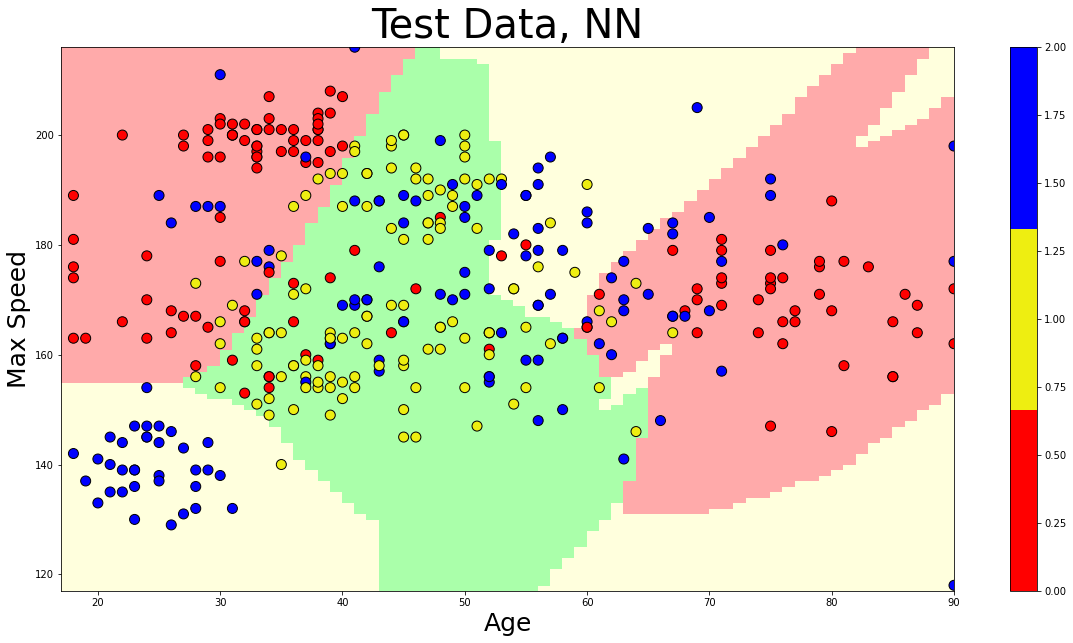

In [126]:
plot_keras_prediction(model, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, NN",
                fname='nn-test.png')

Even though scores do not look too bad, decision boundaries tell us, this is not a good result. We have several means of regularization for neural networks and we use a combination of them as described below.

In [127]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
# regularisation:
# - dropout
# - batch normalization
# - reduce capacity of model

dropout = 0.5
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100, name='hidden1', input_dim=2))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.Dense(100, name='hidden2'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Dropout(dropout))

model.add(tf.keras.layers.Dense(num_categories, name='softmax', activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 100)               300       
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)              

In [128]:
BATCH_SIZE=64
EPOCHS = 3000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, verbose=1)

hist = model.fit(X_train_2_dim, y_train_categorical, 
                 epochs=EPOCHS, batch_size=BATCH_SIZE, 
                 validation_data=(X_test_2_dim, y_test_categorical), 
                 callbacks=[early_stopping],
                 verbose=0)
# %time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, callbacks=[checkpoint, early_stopping])
# %time model.fit(X_train_2_dim, y_train_categorical, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 01384: early stopping


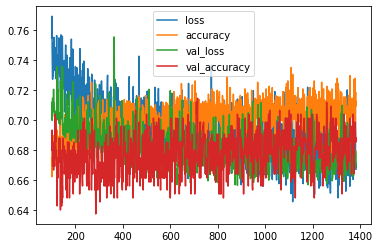

In [130]:
hdf = pd.DataFrame(hist.history)
hdf[100:].plot()

In [ ]:
# use the best model
# from keras.models import load_model

# model = load_model('keras-model.hdf5')

In [131]:
train_loss, train_accuracy = model.evaluate(X_train_2_dim, y_train_categorical, batch_size=BATCH_SIZE)
train_accuracy

18/18 [==============================] - 0s 1ms/step - loss: 0.6075 - accuracy: 0.7387


0.7386666536331177

In [132]:
test_loss, test_accuracy = model.evaluate(X_test_2_dim, y_test_categorical, batch_size=BATCH_SIZE)
test_accuracy

6/6 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6880


0.6880000233650208

In [133]:
plot_keras_prediction(model, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data, Dropout, BachNormalization, Reduced Cap NN",
                fname='nn-reg-test.png')

### It is surprising how smooth and very similar these decision boundaries are to the ones created by SVM